# Assignment 7 - Clean Notebook
## Madi Hamilton

In [3]:
#importing packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx
import networkx as nx
import osmnx as ox
import folium
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [4]:
#we also want to look at CalFresh data to see expressed need on the demand side
calfresh = gpd.read_file('data/CalFresh_Cases_(tract).geojson')

In [5]:
calfresh.info(verbose = True, show_counts = True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   tract                            2495 non-null   object  
 1   families_all                     2495 non-null   int64   
 2   fam_below_200fpl                 2495 non-null   int64   
 3   fam_below_300fpl                 2495 non-null   int64   
 4   fam_received_ssi_cash_assistanc  2495 non-null   int64   
 5   fam_below_fpl_pct                2468 non-null   float64 
 6   fam_below_200fpl_pct             2495 non-null   float64 
 7   fam_below_300fpl_pct             2495 non-null   float64 
 8   fam_received_assistance_pct      2495 non-null   float64 
 9   fam_below_fpl_received_assistan  2368 non-null   float64 
 10  assistance_per_100_fam_below_20  2495 non-null   float64 
 11  assistance_per_100_fam_below_30  2495 non-null   float64 
 12

In [6]:
calincsort=calfresh.sort_values(by='fam_below_fpl_pct',ascending=False)

In [7]:
calincsort.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2495 entries, 2469 to 2494
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   tract                            2495 non-null   object  
 1   families_all                     2495 non-null   int64   
 2   fam_below_200fpl                 2495 non-null   int64   
 3   fam_below_300fpl                 2495 non-null   int64   
 4   fam_received_ssi_cash_assistanc  2495 non-null   int64   
 5   fam_below_fpl_pct                2468 non-null   float64 
 6   fam_below_200fpl_pct             2495 non-null   float64 
 7   fam_below_300fpl_pct             2495 non-null   float64 
 8   fam_received_assistance_pct      2495 non-null   float64 
 9   fam_below_fpl_received_assistan  2368 non-null   float64 
 10  assistance_per_100_fam_below_20  2495 non-null   float64 
 11  assistance_per_100_fam_below_30  2495 non-null   float64 
 12  

<Axes: ylabel='Frequency'>

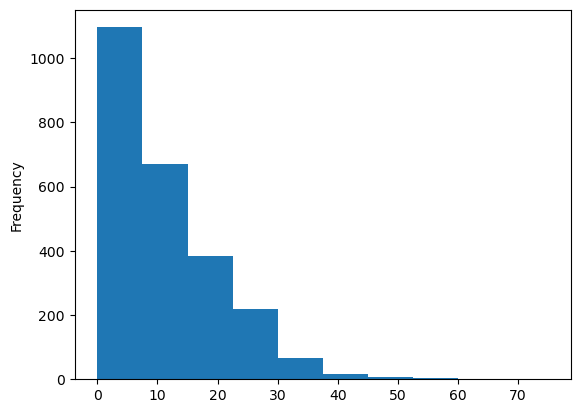

In [8]:
calincsort['fam_below_fpl_pct'].plot.hist()

<Axes: title={'center': 'Top 10 Census Tracts with Percent of Families below the Federal Poverty Level'}, xlabel='tract'>

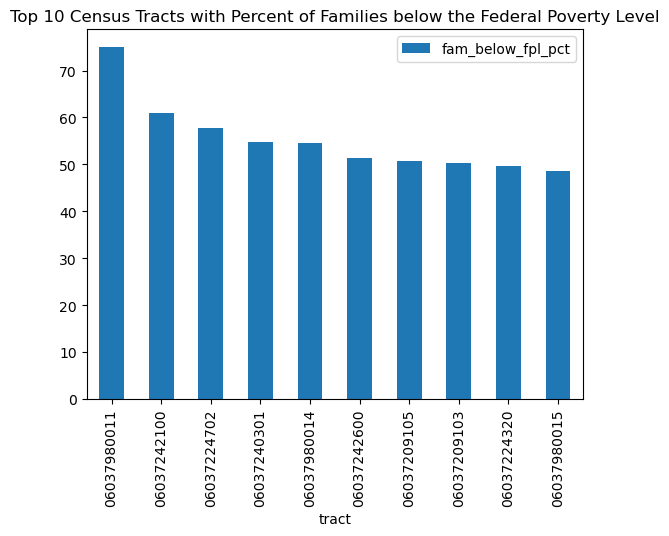

In [9]:
calincsort.head(10).plot.bar(x='tract',y='fam_below_fpl_pct',
                               title='Top 10 Census Tracts with Percent of Families below the Federal Poverty Level')

In [10]:
calfresh['calfresh_per_100_families'].describe()

count    2495.000000
mean       44.629739
std       157.068387
min         0.000000
25%        17.750000
50%        30.000000
75%        41.650000
max      4200.000000
Name: calfresh_per_100_families, dtype: float64

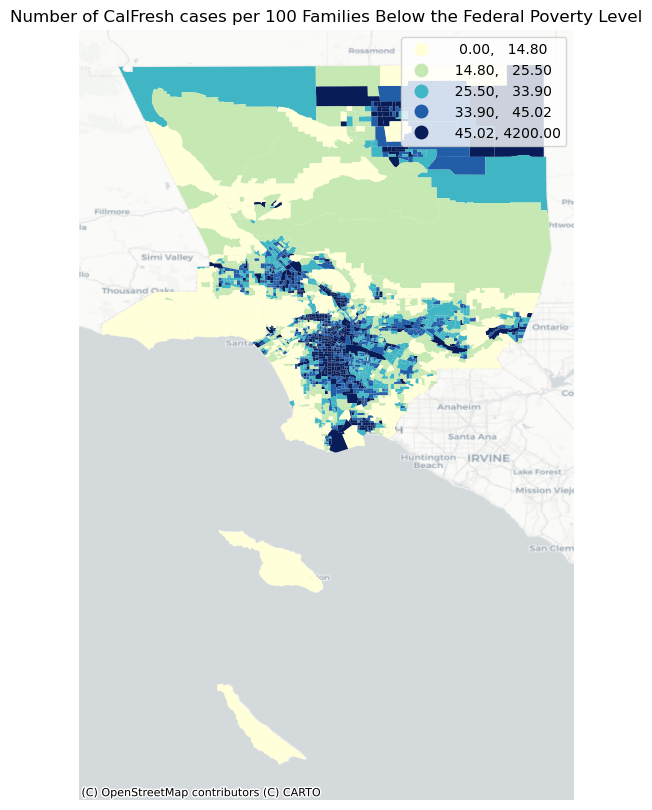

In [11]:
ax =  calfresh.plot(figsize=(12,10),
                   column='calfresh_per_100_families',
                   legend=True,
                   scheme='quantiles',
                    cmap='YlGnBu')
ax.set_axis_off()
ax.set_title('Number of CalFresh cases per 100 Families Below the Federal Poverty Level')
cx.add_basemap(ax,crs=4326,
               source=cx.providers.CartoDB.Positron)
plt.savefig('calfreshrate.png')

In [12]:
#This data provides information on social services offices if someone needs in person support
dpss = gpd.read_file('data/DPSS_Offices.geojson')

In [13]:
dpss.head()

OBJECTID_1           X          Y      Site               Address  \
0           1 -118.073209  33.914928   Norwalk    12727 Norwalk Blvd   
1           2 -118.073209  33.914928   Norwalk    12727 Norwalk Blvd   
2           3 -118.073209  33.914928   Norwalk    12727 Norwalk Blvd   
3           4 -118.265290  34.137380  Glendale  4680 San Fernando Rd   
4           6 -118.265290  34.137380  Glendale  4680 San Fernando Rd   

       City State    Zip Sup   Program       Telephone  \
0   Norwalk    CA  90650   4  CalFresh  (866) 613-3777   
1   Norwalk    CA  90650   4  CalWORKs  (866) 613-3777   
2   Norwalk    CA  90650   4  Medi-Cal  (866) 613-3777   
3  Glendale    CA  91204   5  CalWORKs  (866) 613-3777   
4  Glendale    CA  91204   5  CalFresh  (866) 613-3777   

                      geometry  
0  POINT (-118.07321 33.91493)  
1  POINT (-118.07321 33.91493)  
2  POINT (-118.07321 33.91493)  
3  POINT (-118.26529 34.13738)  
4  POINT (-118.26529 34.13738)

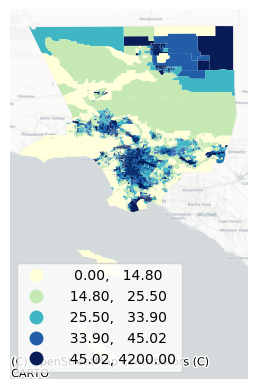

In [14]:
#I want to add the CalFresh offices to this plot as a different color from the other offices
fig, newax = plt.subplots() 
dpss.plot(ax=newax, figsize=(20,20), legend=True)
calfresh.plot(ax=newax, figsize=(12,10),
                   column='calfresh_per_100_families',
                   legend=True,
                   scheme='quantiles',
                    cmap='YlGnBu')
cx.add_basemap(newax,crs=4326,
               source=cx.providers.CartoDB.Positron)
newax.set_axis_off()

In [15]:
#folium map with DPSS offices and CalFresh cases per 100 families
#not sure yet how to make each Program type a unique color
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.GeoJson(
    dpss,
    name='dpss',
    marker=folium.Circle(radius=4, fill_color='orange', fill_opacity=0.4, color='black', weight=1),
    tooltip=folium.GeoJsonTooltip(fields=['Program','City','Zip']),
    popup=folium.GeoJsonPopup(fields=['Program','City','Zip']),
    highlight_function=lambda x: {'fillOpacity': 0.8},
    zoom_on_click=True,
).add_to(m)

folium.Choropleth(
                  geo_data=calfresh, # geo data
                  data=calfresh, # data          
                  key_on='feature.properties.tract', # key, or merge column
                  columns=['tract', 'calfresh_per_100_families'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                    bins=[0,18, 42, 100, 500, 4200],
                  legend_name='Number of CalFresh Cases per 100 Families').add_to(m)    # name on the legend color bar
m

## Cleaning Grocery Store Data

## Goals:
### Show grocery stores and walksheds on top of choropleth of CHD Rate for each census tract

In [16]:
grocery = pd.read_csv('data/Historical SNAP Retailer Locator Data-20231231.csv')

In [17]:
grocery.head()

Record ID                     Store Name                 Store Type  \
0     785740           ADAK GENERAL STORE            Convenience Store   
1     512036  Alaska Commercial Company 325  Combination Grocery/Other   
2     758776  Alaska Commercial Company 220  Combination Grocery/Other   
3     672376       ALEUTIAN COMMERCIAL CO    Combination Grocery/Other   
4     309052   ALEUTIAN COMMERCIAL CO INC          Large Grocery Store   

  Street Number    Street Name Additional Address        City State  Zip Code  \
0         42311  FINGER BAY RD                           ADAK    AK     99546   
1             1     BAYVIEW DR                      KING COVE    AK     99612   
2           100        Main St                NaN  Sand Point    AK     99661   
3           100           MAIN                     SAND POINT    AK     99661   
4           100        MAIN ST                     SAND POINT    AK     99661   

   Zip4          County  Latitude  Longitude Authorization Date    End Date  
0  2036  ALEUTIANS EAST  51.84434  -176.6284         05/08/2006  03/01/2016  
1        ALEUTIANS EAST  55.05876  -162.3134         02/02/1999              
2  9800  ALEUTIANS EAST  55.33546  -160.4955         07/05/2005              
3        ALEUTIANS EAST   0.00000     0.0000         01/26/1973  07/29/1993  
4        ALEUTIANS EAST  55.30257  -160.4045         07/28/1993  07/11/2005

In [18]:
grocery.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996559 entries, 0 to 996558
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Record ID           996559 non-null  int64  
 1   Store Name          996559 non-null  object 
 2   Store Type          996559 non-null  object 
 3   Street Number       996435 non-null  object 
 4   Street Name         995798 non-null  object 
 5   Additional Address  910831 non-null  object 
 6   City                996558 non-null  object 
 7   State               996559 non-null  object 
 8   Zip Code            996559 non-null  int64  
 9   Zip4                996559 non-null  object 
 10  County              996556 non-null  object 
 11  Latitude            996559 non-null  float64
 12  Longitude           996559 non-null  float64
 13  Authorization Date  996559 non-null  object 
 14  End Date            996559 non-null  object 
dtypes: float64(2), int64(2), object(11

In [19]:
np.unique(grocery['Store Type'])

array(['Bakery Specialty', 'Combination Grocery/Other',
       'Convenience Store', 'Delivery Route', "Farmers' Market",
       'Food Buying Co-op', 'Fruits/Veg Specialty', 'Large Grocery Store',
       'Meat/Poultry Specialty', 'Medium Grocery Store',
       'Military Commissary', 'Seafood Specialty', 'Small Grocery Store',
       'Super Store', 'Supermarket', 'Unknown', 'Wholesaler'],
      dtype=object)

In [20]:
grocery = grocery[grocery['Store Type'].str.contains('Bakery Specialty')==False]

In [21]:
grocery = grocery[grocery['Store Type'].str.contains('Convenience Store')==False]

In [22]:
grocery= grocery[grocery['Store Type'].str.contains('Delivery Route')==False]

In [23]:
grocery=grocery[grocery['Store Type'].str.contains('Military Commissary')==False]

In [24]:
grocery=grocery[grocery['Store Type'].str.contains('Unknown')==False]

In [25]:
grocery=grocery[grocery['Store Type'].str.contains('Wholesaler')==False]

In [26]:
grocery=grocery[grocery['Store Type'].str.contains('Fruits/Veg Specialty')==False]

In [27]:
grocery=grocery[grocery['Store Type'].str.contains('Meat/Poultry Specialty')==False]

In [28]:
grocery=grocery[grocery['Store Type'].str.contains('Seafood Specialty')==False]

In [29]:
grocery=grocery[grocery['Store Type'].str.contains('Combination Grocery/Other')==False]

In [30]:
cleanedgrocery = grocery.query("County == 'LOS ANGELES'")
cleanedgrocery.sample(5)

Record ID               Store Name            Store Type Street Number  \
93593     859247    Yanileth Mini Store    Medium Grocery Store          7518   
79206    1157096  La Alicia Meat Market     Small Grocery Store          3116   
72702     580009  EL CANEY MEAT MKT. #1             Supermarket          4600   
79685     253860      LA FIESTA TAPATIA    Medium Grocery Store         15019   
79216     246817     LA ALTENITA MARKET     Small Grocery Store          4537   

           Street Name Additional Address             City State  Zip Code  \
93593        S Main St                         Los Angeles    CA     90003   
79206         E 4th St                         Los Angeles    CA     90063   
72702    Maplewood Ave                         Los Angeles    CA     90004   
79685  S  ATLANTIC AVE                     RANCHO DOMINGUE    CA     90221   
79216         Clara St                              Cudahy    CA     90201   

       Zip4       County  Latitude  Longitude Authorization Date    End Date  
93593  2128  LOS ANGELES  33.97200  -118.2739         09/09/2008  02/04/2013  
79206  3103  LOS ANGELES  34.03564  -118.2007         07/21/2014              
72702  1809  LOS ANGELES   0.00000     0.0000         04/23/1982  03/03/1997  
79685        LOS ANGELES   0.00000     0.0000         02/17/1993  01/09/1994  
79216  5015  LOS ANGELES   0.00000     0.0000         04/16/1997  12/02/1997

In [31]:
cleanedgrocery.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 10267 entries, 63286 to 93883
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Record ID           10267 non-null  int64  
 1   Store Name          10267 non-null  object 
 2   Store Type          10267 non-null  object 
 3   Street Number       10267 non-null  object 
 4   Street Name         10267 non-null  object 
 5   Additional Address  9657 non-null   object 
 6   City                10267 non-null  object 
 7   State               10267 non-null  object 
 8   Zip Code            10267 non-null  int64  
 9   Zip4                10267 non-null  object 
 10  County              10267 non-null  object 
 11  Latitude            10267 non-null  float64
 12  Longitude           10267 non-null  float64
 13  Authorization Date  10267 non-null  object 
 14  End Date            10267 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 1.3+

In [32]:
cleanedgrocery['end_date']=cleanedgrocery['End Date'].str.slice(start=-4)
cleanedgrocery

/tmp/ipykernel_84/3648520144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedgrocery['end_date']=cleanedgrocery['End Date'].str.slice(start=-4)


Record ID                            Store Name            Store Type  \
63286     522382                $1 + DISCOUNT MARKET     Small Grocery Store   
63295     988037            $1 Store & Discount Mart    Medium Grocery Store   
63304     600292                 .99 CENTS LAND PLUS     Small Grocery Store   
63310    1154471                      1 And Up Store     Small Grocery Store   
63320    1267829                1 Stop Shop Rite Inc     Small Grocery Store   
...          ...                                   ...                   ...   
93869    1408419                        ZJ Nutrition     Small Grocery Store   
93875    1224024                            Zovk Inc    Medium Grocery Store   
93879    1263390  Zuly's 99 And Up Discount 99 Y Mas     Small Grocery Store   
93882     605946               ZVARTNOTS MINI MARKET     Small Grocery Store   
93883     579323               ZVAZTROTS MINI MARKET     Small Grocery Store   

      Street Number        Street Name Additional Address             City  \
63286         10401    Long Beach Blvd                             Lynwood   
63295           848    W Palmdale Blvd                            Palmdale   
63304          1070         E Broadway                          Long Beach   
63310         11151        Avalon Blvd            Ste 105      Los Angeles   
63320          1110  S Long Beach Blvd              Ste 2          Compton   
...             ...                ...                ...              ...   
93869          2031          E 10th St                NaN       Long Beach   
93875         11009       Burbank Blvd            Ste 125  North Hollywood   
93879          3326      S Central Ave                         Los Angeles   
93882           209       N Verdugo Rd                            Glendale   
93883          2353    W Whittier Blvd                          Montebello   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63286    CA     90262  1600  LOS ANGELES  33.93952  -118.2144   
63295    CA     93551  4250  LOS ANGELES  34.58665  -118.1458   
63304    CA     90802  3412  LOS ANGELES   0.00000     0.0000   
63310    CA     90061  3077  LOS ANGELES  33.93383  -118.2652   
63320    CA     90221  4479  LOS ANGELES  33.88638  -118.2063   
...     ...       ...   ...          ...       ...        ...   
93869    CA     90804  4501  LOS ANGELES  33.77922  -118.1669   
93875    CA     91601  5749  LOS ANGELES  34.17219  -118.3707   
93879    CA     90011  2518  LOS ANGELES  34.01336  -118.2565   
93882    CA     91206  3939  LOS ANGELES   0.00000     0.0000   
93883    CA     90640  3006  LOS ANGELES   0.00000     0.0000   

      Authorization Date    End Date end_date  
63286         08/05/1998  08/04/2010     2010  
63295         02/04/2011  04/12/2011     2011  
63304         04/04/2003  04/28/2004     2004  
63310         07/17/2014  05/31/2016     2016  
63320         12/22/2016  06/25/2019     2019  
...                  ...         ...      ...  
93869         10/15/2020  06/16/2022     2022  
93875         02/03/2016  03/07/2019     2019  
93879         11/21/2016  09/03/2018     2018  
93882         04/16/1992  05/26/1993     1993  
93883         09/13/1988  10/07/1992     1992  

[10267 rows x 16 columns]

In [33]:
cleanedgrocery['end_date'].unique()

array(['2010', '2011', '2004', '2016', '2019', '2009', '2005', ' ',
       '2015', '2018', '2003', '2012', '2014', '2008', '1997', '2001',
       '1999', '2000', '2017', '1991', '1994', '2006', '2020', '1992',
       '1996', '2007', '1993', '1998', '2013', '2002', '1995', '2023',
       '2021', '1990', '2022'], dtype=object)

In [34]:
#dropping any grocery stores that were closed before 2020
#only remaining grocery stores are still open or closed after 2020
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2010')==False]

In [35]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2011')==False]

In [36]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2018')==False]

In [37]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2016')==False]

In [38]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2019')==False]

In [39]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2009')==False]

In [40]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2015')==False]

In [41]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2005')==False]

In [42]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2003')==False]

In [43]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2012')==False]

In [44]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2014')==False]

In [45]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2008')==False]

In [46]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1997')==False]

In [47]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2001')==False]

In [48]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1999')==False]

In [49]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2000')==False]

In [50]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2017')==False]

In [51]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1991')==False]

In [52]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1994')==False]

In [53]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2006')==False]

In [54]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1992')==False]

In [55]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1996')==False]

In [56]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2007')==False]

In [57]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1993')==False]

In [58]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1998')==False]

In [59]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2013')==False]

In [60]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2002')==False]

In [61]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1990')==False]

In [62]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('1995')==False]

In [63]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2004')==False]

In [64]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['end_date'].str.contains('2020')==False]

In [65]:
cleanedgrocery

Record ID                       Store Name            Store Type  \
63347    1057607                   168 Market 803           Super Store   
63348    1171270                   168 Market 806           Supermarket   
63349    1192904                   168 Market 805           Super Store   
63350    1263449                  168 Market 5801           Super Store   
63415    1246643  365 by Whole Foods Market 10658           Super Store   
...          ...                              ...                   ...   
93817     764764                   Zamora Bros.    Medium Grocery Store   
93855    1287162                         Zeytun    Medium Grocery Store   
93859     426824            ZIGGY'S MEAT MARKET             Supermarket   
93865    1398029                    Zion Market             Super Store   
93869    1408419                   ZJ Nutrition     Small Grocery Store   

      Street Number     Street Name Additional Address              City  \
63347           933  E Las Tunas Dr                          San Gabriel   
63348         17120       Colima Rd                     Hacienda Heights   
63349         19725       Colima Rd                      Rowland Heights   
63350          1421   E Valley Blvd                             Alhambra   
63415          2520   Glendale Blvd                          Los Angeles   
...             ...             ...                ...               ...   
93817          1559     W Pico Blvd                NaN       Los Angeles   
93855          5135   W Sunset Blvd                          Los Angeles   
93859           965    N Maclay Ave                         San Fernando   
93865           888   S Vermont Ave                NaN       Los Angeles   
93869          2031       E 10th St                NaN        Long Beach   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63347    CA     91776  1640  LOS ANGELES  34.10347  -118.0877   
63348    CA     91745  6768  LOS ANGELES  33.99066  -117.9333   
63349    CA     91748  3299  LOS ANGELES  33.98619  -117.8717   
63350    CA     91801  5239  LOS ANGELES  34.07928  -118.1099   
63415    CA     90039  3220  LOS ANGELES  34.10309  -118.2592   
...     ...       ...   ...          ...       ...        ...   
93817    CA     90015  2407  LOS ANGELES  34.04479  -118.2764   
93855    CA     90027  5715  LOS ANGELES  34.09815  -118.3017   
93859    CA     91340  1440  LOS ANGELES  34.29338  -118.4276   
93865    CA     90005  1523  LOS ANGELES  34.05605  -118.2916   
93869    CA     90804  4501  LOS ANGELES  33.77922  -118.1669   

      Authorization Date    End Date end_date  
63347         06/01/2012                       
63348         11/20/2014                       
63349         04/09/2015                       
63350         10/24/2016                       
63415         05/11/2016                       
...                  ...         ...      ...  
93817         05/25/2023                       
93855         06/21/2017                       
93859         07/12/1995                       
93865         03/25/2020                       
93869         10/15/2020  06/16/2022     2022  

[2496 rows x 16 columns]

In [66]:
cleanedgrocery['end_date'].unique()

array([' ', '2023', '2021', '2022'], dtype=object)

In [67]:
cleanedgrocery['open_date']=cleanedgrocery['Authorization Date'].str.slice(start=-4)
cleanedgrocery

Record ID                       Store Name            Store Type  \
63347    1057607                   168 Market 803           Super Store   
63348    1171270                   168 Market 806           Supermarket   
63349    1192904                   168 Market 805           Super Store   
63350    1263449                  168 Market 5801           Super Store   
63415    1246643  365 by Whole Foods Market 10658           Super Store   
...          ...                              ...                   ...   
93817     764764                   Zamora Bros.    Medium Grocery Store   
93855    1287162                         Zeytun    Medium Grocery Store   
93859     426824            ZIGGY'S MEAT MARKET             Supermarket   
93865    1398029                    Zion Market             Super Store   
93869    1408419                   ZJ Nutrition     Small Grocery Store   

      Street Number     Street Name Additional Address              City  \
63347           933  E Las Tunas Dr                          San Gabriel   
63348         17120       Colima Rd                     Hacienda Heights   
63349         19725       Colima Rd                      Rowland Heights   
63350          1421   E Valley Blvd                             Alhambra   
63415          2520   Glendale Blvd                          Los Angeles   
...             ...             ...                ...               ...   
93817          1559     W Pico Blvd                NaN       Los Angeles   
93855          5135   W Sunset Blvd                          Los Angeles   
93859           965    N Maclay Ave                         San Fernando   
93865           888   S Vermont Ave                NaN       Los Angeles   
93869          2031       E 10th St                NaN        Long Beach   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63347    CA     91776  1640  LOS ANGELES  34.10347  -118.0877   
63348    CA     91745  6768  LOS ANGELES  33.99066  -117.9333   
63349    CA     91748  3299  LOS ANGELES  33.98619  -117.8717   
63350    CA     91801  5239  LOS ANGELES  34.07928  -118.1099   
63415    CA     90039  3220  LOS ANGELES  34.10309  -118.2592   
...     ...       ...   ...          ...       ...        ...   
93817    CA     90015  2407  LOS ANGELES  34.04479  -118.2764   
93855    CA     90027  5715  LOS ANGELES  34.09815  -118.3017   
93859    CA     91340  1440  LOS ANGELES  34.29338  -118.4276   
93865    CA     90005  1523  LOS ANGELES  34.05605  -118.2916   
93869    CA     90804  4501  LOS ANGELES  33.77922  -118.1669   

      Authorization Date    End Date end_date open_date  
63347         06/01/2012                           2012  
63348         11/20/2014                           2014  
63349         04/09/2015                           2015  
63350         10/24/2016                           2016  
63415         05/11/2016                           2016  
...                  ...         ...      ...       ...  
93817         05/25/2023                           2023  
93855         06/21/2017                           2017  
93859         07/12/1995                           1995  
93865         03/25/2020                           2020  
93869         10/15/2020  06/16/2022     2022      2020  

[2496 rows x 17 columns]

In [68]:
cleanedgrocery['open_date'].unique()

array(['2012', '2014', '2015', '2016', '2013', '2022', '1989', '1990',
       '1991', '1992', '1994', '1995', '1998', '2003', '2023', '2021',
       '2017', '2008', '2020', '2019', '2018', '2010', '1996', '2006',
       '2009', '2001', '1997', '2007', '1930', '1999', '2011', '1987',
       '2005', '1988', '1993', '2002', '1977', '1985', '2004', '2000',
       '1984', '1986', '1982', '1965', '1966', '1971', '1983', '1975',
       '1976', '1974', '1979'], dtype=object)

In [69]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['open_date'].str.contains('2022')==False]

In [70]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['open_date'].str.contains('2023')==False]

In [71]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['open_date'].str.contains('2021')==False]

In [72]:
cleanedgrocery = cleanedgrocery[cleanedgrocery['open_date'].str.contains('2020')==False]

In [73]:
cleanedgrocery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1870 entries, 63347 to 93859
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Record ID           1870 non-null   int64  
 1   Store Name          1870 non-null   object 
 2   Store Type          1870 non-null   object 
 3   Street Number       1870 non-null   object 
 4   Street Name         1870 non-null   object 
 5   Additional Address  1726 non-null   object 
 6   City                1870 non-null   object 
 7   State               1870 non-null   object 
 8   Zip Code            1870 non-null   int64  
 9   Zip4                1870 non-null   object 
 10  County              1870 non-null   object 
 11  Latitude            1870 non-null   float64
 12  Longitude           1870 non-null   float64
 13  Authorization Date  1870 non-null   object 
 14  End Date            1870 non-null   object 
 15  end_date            1870 non-null   object 
 16  open_d

In [74]:
cleanedgrocery['latlon'] = cleanedgrocery[['Latitude', 'Longitude']].values.tolist()
cleanedgrocery

Record ID                       Store Name            Store Type  \
63347    1057607                   168 Market 803           Super Store   
63348    1171270                   168 Market 806           Supermarket   
63349    1192904                   168 Market 805           Super Store   
63350    1263449                  168 Market 5801           Super Store   
63415    1246643  365 by Whole Foods Market 10658           Super Store   
...          ...                              ...                   ...   
93779    1163074                          Yummy             Supermarket   
93780    1108714                          Yummy             Supermarket   
93816     764764                   Zamora Bros.    Medium Grocery Store   
93855    1287162                         Zeytun    Medium Grocery Store   
93859     426824            ZIGGY'S MEAT MARKET             Supermarket   

      Street Number       Street Name Additional Address              City  \
63347           933    E Las Tunas Dr                          San Gabriel   
63348         17120         Colima Rd                     Hacienda Heights   
63349         19725         Colima Rd                      Rowland Heights   
63350          1421     E Valley Blvd                             Alhambra   
63415          2520     Glendale Blvd                          Los Angeles   
...             ...               ...                ...               ...   
93779          5520  San Vicente Blvd                          Los Angeles   
93780          3607     W Sunset Blvd                          Los Angeles   
93816          1559       W Pico Blvd                NaN       Los Angeles   
93855          5135     W Sunset Blvd                          Los Angeles   
93859           965      N Maclay Ave                         San Fernando   

      State  Zip Code  Zip4       County  Latitude  Longitude  \
63347    CA     91776  1640  LOS ANGELES  34.10347  -118.0877   
63348    CA     91745  6768  LOS ANGELES  33.99066  -117.9333   
63349    CA     91748  3299  LOS ANGELES  33.98619  -117.8717   
63350    CA     91801  5239  LOS ANGELES  34.07928  -118.1099   
63415    CA     90039  3220  LOS ANGELES  34.10309  -118.2592   
...     ...       ...   ...          ...       ...        ...   
93779    CA     90019  2799  LOS ANGELES  34.05383  -118.3545   
93780    CA     90026  1058  LOS ANGELES  34.09010  -118.2771   
93816    CA     90015  2407  LOS ANGELES  34.04479  -118.2764   
93855    CA     90027  5715  LOS ANGELES  34.09815  -118.3017   
93859    CA     91340  1440  LOS ANGELES  34.29338  -118.4276   

      Authorization Date    End Date end_date open_date                 latlon  
63347         06/01/2012                           2012  [34.10347, -118.0877]  
63348         11/20/2014                           2014  [33.99066, -117.9333]  
63349         04/09/2015                           2015  [33.98619, -117.8717]  
63350         10/24/2016                           2016  [34.07928, -118.1099]  
63415         05/11/2016                           2016  [34.10309, -118.2592]  
...                  ...         ...      ...       ...                    ...  
93779         12/01/2014                           2014  [34.05383, -118.3545]  
93780         04/10/2019                           2019   [34.0901, -118.2771]  
93816         04/20/2011  07/01/2022     2022      2011  [34.04479, -118.2764]  
93855         06/21/2017                           2017  [34.09815, -118.3017]  
93859         07/12/1995                           1995  [34.29338, -118.4276]  

[1870 rows x 18 columns]

In [78]:
grocerysubset = cleanedgrocery.head(5)
grocerysubset

Record ID                       Store Name   Store Type Street Number  \
63347    1057607                   168 Market 803  Super Store           933   
63348    1171270                   168 Market 806  Supermarket         17120   
63349    1192904                   168 Market 805  Super Store         19725   
63350    1263449                  168 Market 5801  Super Store          1421   
63415    1246643  365 by Whole Foods Market 10658  Super Store          2520   

          Street Name Additional Address              City State  Zip Code  \
63347  E Las Tunas Dr                          San Gabriel    CA     91776   
63348       Colima Rd                     Hacienda Heights    CA     91745   
63349       Colima Rd                      Rowland Heights    CA     91748   
63350   E Valley Blvd                             Alhambra    CA     91801   
63415   Glendale Blvd                          Los Angeles    CA     90039   

       Zip4       County  Latitude  Longitude Authorization Date End Date  \
63347  1640  LOS ANGELES  34.10347  -118.0877         06/01/2012            
63348  6768  LOS ANGELES  33.99066  -117.9333         11/20/2014            
63349  3299  LOS ANGELES  33.98619  -117.8717         04/09/2015            
63350  5239  LOS ANGELES  34.07928  -118.1099         10/24/2016            
63415  3220  LOS ANGELES  34.10309  -118.2592         05/11/2016            

      end_date open_date                 latlon  
63347               2012  [34.10347, -118.0877]  
63348               2014  [33.99066, -117.9333]  
63349               2015  [33.98619, -117.8717]  
63350               2016  [34.07928, -118.1099]  
63415               2016  [34.10309, -118.2592]

In [88]:
grocerysubset.to_csv('data/grocerysubset.csv')

## For Loop of Isochrone Map for Each Grocery Store

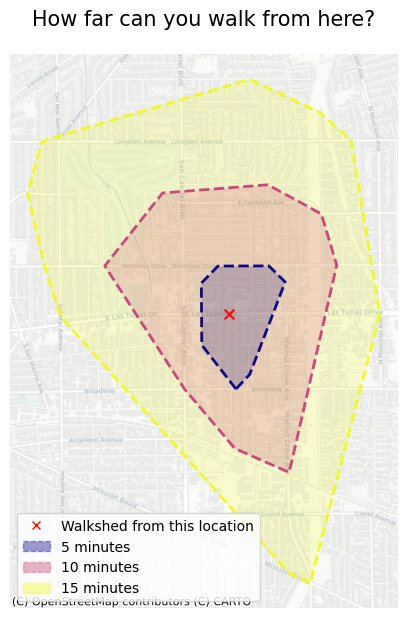

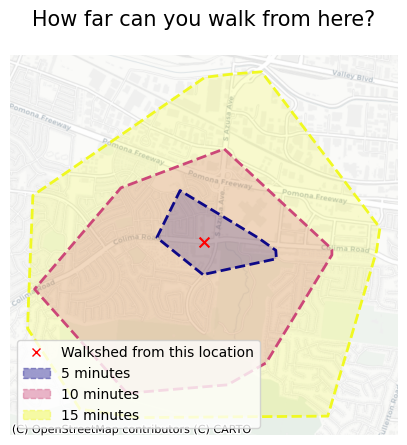

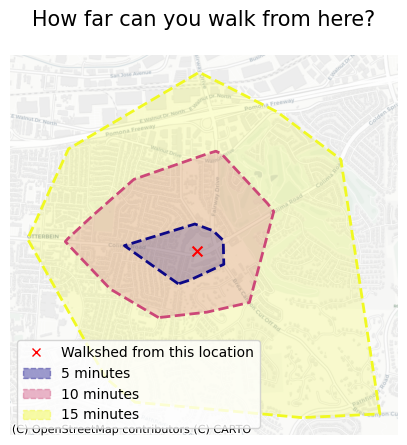

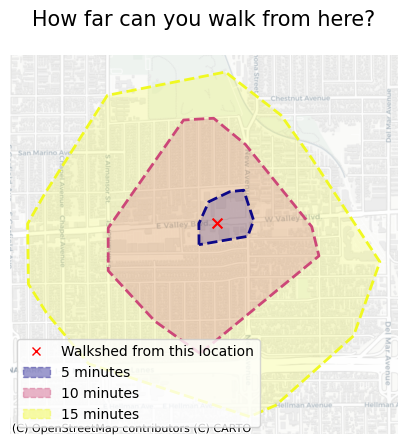

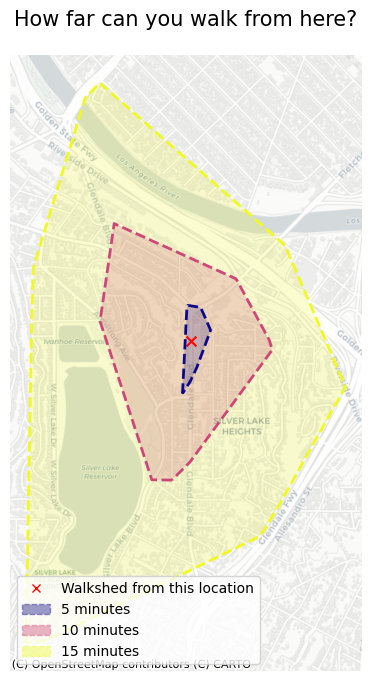

In [80]:
# call your new function 
def isomap(latlon):
    # configure the place, network type, trip times, and travel speed
    network_type = 'walk'
    trip_times = [5,10,15] 
    meters_per_minute = 75 # travel distance per minute
    cmap = 'plasma'
    title = 'How far can you walk from here?'
    # download the street network
    G = ox.graph_from_point(latlon, network_type=network_type, dist = 2000)

    # project our network data to Web Mercator (measurements are in meters)
    G = ox.project_graph(G, to_crs='epsg:3857')

    # convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

    # get the bounding box coordinates
    minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds

    # calculate the centroid
    centroid_x = (maxx-minx)/2 + minx
    centroid_y = (maxy-miny)/2 + miny

    # use osmnx's distance.nearest_nodes command to get the id for the nearest node
    center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)

    # create a new column, calculate the time it takes to travel that edge
    gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

    # assign a color hex code for each trip time isochrone
    iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap=cmap, 
                                start=0, 
                                return_hex=True)

    # create a list of "zipped" time/colors
    time_color = list(zip(trip_times, iso_colors))

    # reverse the order so that outside nodes get associated first
    time_color.reverse()

    # loop through each trip time and associated color
    for time, color in list(time_color):

        # for each trip time, create an egograph of nodes that fall within that distance
        subgraph = nx.ego_graph(G, center_node, radius=time)

        # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
        for node in subgraph.nodes():
            gdf_nodes.loc[node,'time'] = time
            gdf_nodes.loc[node,'color'] = color

    # the NaN values then need to be populated with a valid color
    gdf_nodes['color'].fillna('#cccccc', inplace=True)

    # dissolve the nodes by time
    # adding the "time" argument creates a separate geometry (multipoint in this case) for each unique time category
    isochrones = gdf_nodes.dissolve(by = "time")

    # for each row, create a convex hull
    isochrones = isochrones.convex_hull.reset_index(name='geometry')

    # reverse the order so that outer polygon gets drawn first
    isochrones.sort_values(by='time', ascending=False,inplace=True)

    # reverse the colors too!
    iso_colors.reverse()

    ########################

    #    Make the map!

    ########################
    # set up the subplots
    fig, ax = plt.subplots(figsize=(5,8))

    # add the isochrone boundary
    isochrones.boundary.plot(
        ax=ax,
        alpha=1,
        linestyle='--',
        color=iso_colors,
        lw=2
        ) 

    # add the isochrones
    isochrones.plot(
        ax=ax, 
        alpha=0.2, 
        categorical=True, # even though it is numeric, treat it as categorical
        color=iso_colors,
        )

    # add the center node in red
    gdf_nodes.loc[[center_node]].plot(
        ax=ax,
        color='r',
        marker='x',
        markersize=50
        )

    # build custom legend
    legend_elements = [
        # add the center node to the legend
        Line2D([0], [0], marker='x', color='red', linestyle='',label='Walkshed from this location', markersize=6),
        ]

    # sort back to small time to large time
    # time_color.sort(reverse=False)
    time_color.reverse()

    # loop through the list of time/colors and add each to the legend
    for time,color in list(time_color):
        legend_item = Patch(facecolor=color, edgecolor=color, linestyle='--',linewidth=1,label=str(time)+' minutes',alpha=0.4)
        legend_elements.append(legend_item)

    # add the legend
    ax.legend(handles=legend_elements,loc='lower left') # location options: upper/center/lower and left/center/right

    # add a title
    ax.set_title(title,fontsize=15,pad=10)

    # hide the axis
    ax.axis('off')

    # add the basemap
    cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)

latlon = list(grocerysubset.latlon)

for a in latlon:
    isomap(latlon=a)

# Start Here
## For Loop - Saving Output to Existing Dataframe

In [ ]:
#importing packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx
import networkx as nx
import osmnx as ox
import folium
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [90]:
grocerysubset = pd.read_csv('data/grocerysubset.csv')

In [81]:
walksheds = pd.DataFrame(columns=['time','geometry'])
walksheds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      0 non-null      object
 1   geometry  0 non-null      object
dtypes: object(2)
memory usage: 132.0+ bytes


In [87]:
def isochrones(latlon=latlon):
    # configure the place, network type, trip times, and travel speed
    network_type = 'walk'
    trip_times = [10,15] 
    meters_per_minute = 75 # travel distance per minute
    cmap = 'plasma'
    title = 'How far can you walk from here?'
    # download the street network
    G = ox.graph_from_point(latlon, network_type=network_type, dist = 2000)
    
    # project our network data to Web Mercator (measurements are in meters)
    G = ox.project_graph(G, to_crs='epsg:3857')
    
    # convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    
    # get the bounding box coordinates
    minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
    
    # calculate the centroid
    centroid_x = (maxx-minx)/2 + minx
    centroid_y = (maxy-miny)/2 + miny
    
    # use osmnx's distance.nearest_nodes command to get the id for the nearest node
    center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
    
    # create a new column, calculate the time it takes to travel that edge
    gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute
    
    # assign a color hex code for each trip time isochrone
    iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap=cmap, 
                                start=0, 
                                return_hex=True)
    
    # create a list of "zipped" time/colors
    time_color = list(zip(trip_times, iso_colors))
    
    # reverse the order so that outside nodes get associated first
    time_color.reverse()
    
    # loop through each trip time and associated color
    for time, color in list(time_color):
    
        # for each trip time, create an egograph of nodes that fall within that distance
        subgraph = nx.ego_graph(G, center_node, radius=time)
    
        # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
        for node in subgraph.nodes():
            gdf_nodes.loc[node,'time'] = time
            gdf_nodes.loc[node,'color'] = color
    
    # the NaN values then need to be populated with a valid color
    gdf_nodes['color'].fillna('#cccccc', inplace=True)
    
    # dissolve the nodes by time
    # adding the "time" argument creates a separate geometry (multipoint in this case) for each unique time category
    isochrones = gdf_nodes.dissolve(by = "time")
    
    # for each row, create a convex hull
    isochrones = isochrones.convex_hull.reset_index(name='geometry')
    
    # reverse the order so that outer polygon gets drawn first
    isochrones.sort_values(by='time', ascending=False,inplace=True)
    
    # reverse the colors too!
    iso_colors.reverse()

    isochrones=pd.DataFrame(isochrones)
    isochrones.info()
    

#setting the inputs
latlong = list(grocerysubset.latlon)

#for loop to run the function
for a in latlong:
    isochrones(latlon=a)
    walksheds = walksheds.concat(isochrones,ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   time      2 non-null      float64 
 1   geometry  2 non-null      geometry
dtypes: float64(1), geometry(1)
memory usage: 48.0 bytes


AttributeError: 'DataFrame' object has no attribute 'concat'

I could try to pass all the grocery stores through, but I don't most likely don't have the memory to complete such a function nor would the results be insightful in 1000+ separate maps. Instead, my objective is to write polygons for the 10 and 15 minute walksheds for each location and plot them on a folium map with CHD prevalence underneath.